<a href="https://colab.research.google.com/github/bugeki/workshops/blob/main/Statistics_Assignment_5_(Hypothesis_Tests).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade scipy

     |████████████████████████████████| 38.1 MB 34.9 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [55]:

import pandas as pd
import numpy as np
import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
print(scipy.__version__)
from statsmodels.stats.weightstats import ztest

1.7.3


EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

**Solution:** 
ho >> mu = 13.2

ha >> mu < 13.2

one-tailed (lower) hypothesis test

alpha = 0.01 is significance level
normal distribution and sample size > 30 so z-test applied.

In [ ]:
alpha = 0.01

In [ ]:
sigma = 2.5 # sd of pop
mu = 13.20 # Pop. mean
xbar = 12.20 # sample mean 
n = 40 # number of sample
 

# z_test = (xbar - mu)/(sigma/sqrt(n))
z_test = (12.2 - 13.2) / (2.5/np.sqrt(40))
z_test

-2.5298221281347035

In [ ]:
p_value = stats.norm.cdf(z_test)
p_value

0.005706018193000826

In [ ]:
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06



Ho SS means are equal
Ha SS means are not equal
independent t test
population with unknown distribution

In [3]:
soil = pd.read_csv("/content/soil - Sheet1.csv")

In [ ]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [ ]:
soil["Soil2"].mean()

1.4171142857142855

In [4]:
twoSample = stats.ttest_ind(soil["Soil1"], soil["Soil2"], nan_policy='omit')
twoSample


Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [ ]:
##  twosample = 

alpha = 0.05
p_value = twoSample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345


In [64]:
pisa = pd.read_csv("/content/2015 PISA Test - Sheet1.csv")

In [6]:
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [10]:
pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [11]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [9]:
pisa.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [12]:
pisa.shape

(70, 6)

In [14]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [37]:
pisa[pisa['Continent_Code'].isnull()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NaN,88.470000,515.6474,526.6678,527.7047
13,CRI,NaN,59.762950,400.2534,427.4875,419.6080
18,DOM,NaN,54.215766,327.7020,357.7377,331.6388
45,MEX,NaN,57.431043,408.0235,423.2765,415.7099
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [45]:
pisa[pisa['Continent_Code']=="NA"]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science


In [47]:
pisa[pisa['Continent_Code']=="SA"]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
67,URY,SA,64.600000,417.9919,436.5721,435.3630


In [65]:
pisa['Continent_Code'].fillna(value='NA', inplace = True)

In [49]:
pisa[pisa['Continent_Code']=='NA']

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NA,88.470000,515.6474,526.6678,527.7047
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
18,DOM,NA,54.215766,327.7020,357.7377,331.6388
45,MEX,NA,57.431043,408.0235,423.2765,415.7099
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [50]:
pisa.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS  ...          OC          SA
internet_users_per_100 count    2.000000   17.000000  ...    2.000000    7.000000
                       mean    43.359918   68.455613  ...   86.391704   60.180494
                       std      7.297226   21.086060  ...    2.589686    9.772455
                       min     38.200000   21.976068  ...   84.560519   40.900000
                       25%     40.779959   50.300000  ...   85.476112   57.116462
                       50%     43.359918   74.000000  ...   86.391704   64.289000
                       75%     45.939877   84.948353  ...   87.307296   66.321532
                       max     48.519836   92.884826  ...   88.222889   69.198471
Math                   count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   363.212100  466.216647  ...  494.559750  402.887700
                       std      5.099513   64.356490  ...    0.938401   18.128894
                       min    359.606200  380.259000  ...  493.896200  377.069500
                       25%    361.409150  403.833200  ...  494.227975  388.102200
                       50%    363.212100  459.816000  ...  494.559750  409.033300
                       75%    365.015050  531.296100  ...  494.891525  417.617650
                       max    366.818000  564.189700  ...  495.223300  422.671400
Reading                count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   355.457400  454.059682  ...  506.085650  425.359229
                       std      7.916909   57.048962  ...    4.504341   19.709688
                       min    349.859300  346.549000  ...  502.900600  397.541400
                       25%    352.658350  408.102200  ...  504.493125  416.126900
                       50%    355.457400  433.542300  ...  506.085650  425.303100
                       75%    358.256450  508.690500  ...  507.678175  431.922700
                       max    361.055500  535.100200  ...  509.270700  458.570900
Science                count    2.000000   17.000000  ...    2.000000    7.000000
                       mean   381.074250  467.945847  ...  511.648700  421.747186
                       std      7.536556   56.671371  ...    2.340241   18.470319
                       min    375.745100  386.485400  ...  509.993900  396.683600
                       25%    378.409675  417.611200  ...  510.821300  408.205450
                       50%    381.074250  456.483600  ...  511.648700  424.590500
                       75%    383.738825  523.277400  ...  512.476100  433.794600
                       max    386.403400  555.574700  ...  513.303500  446.956100

[32 rows x 6 columns]

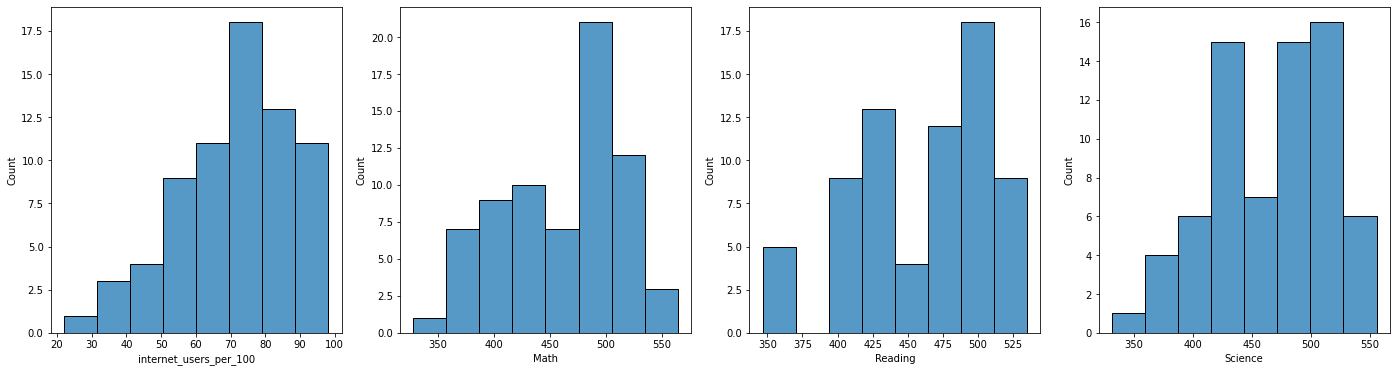

In [63]:
fig, axes = plt.subplots(1,4, figsize=(24,6))

sns.histplot(pisa['internet_users_per_100'], ax=axes[0] )
sns.histplot(pisa['Math'],ax=axes[1])
sns.histplot(pisa['Reading'], ax=axes[2])
sns.histplot(pisa['Science'], ax=axes[3]);

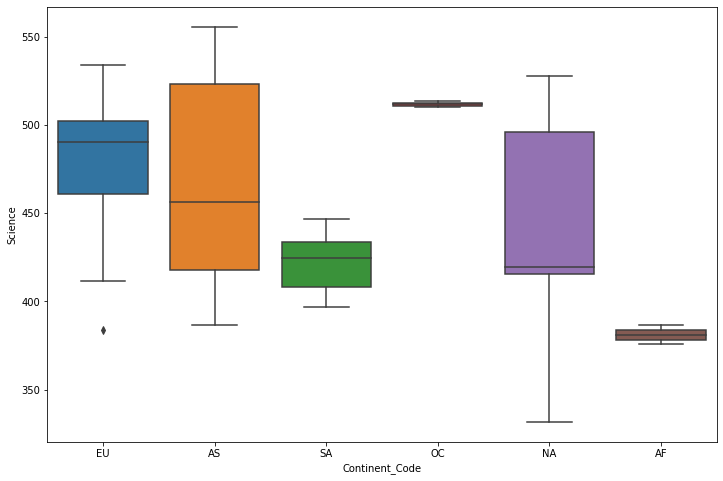

In [122]:
plt.figure(figsize = (12,8))
sns.boxplot(data=pisa, x="Continent_Code", y="Science");
plt.show()

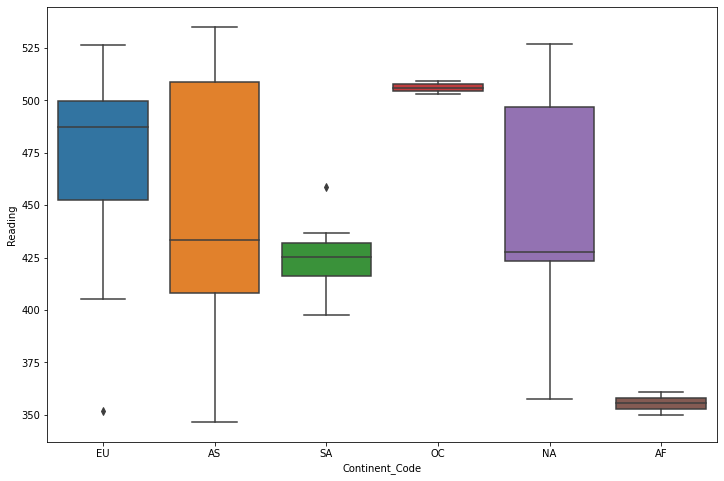

In [124]:
plt.figure(figsize = (12,8))
sns.boxplot(data=pisa, x="Continent_Code", y="Reading");

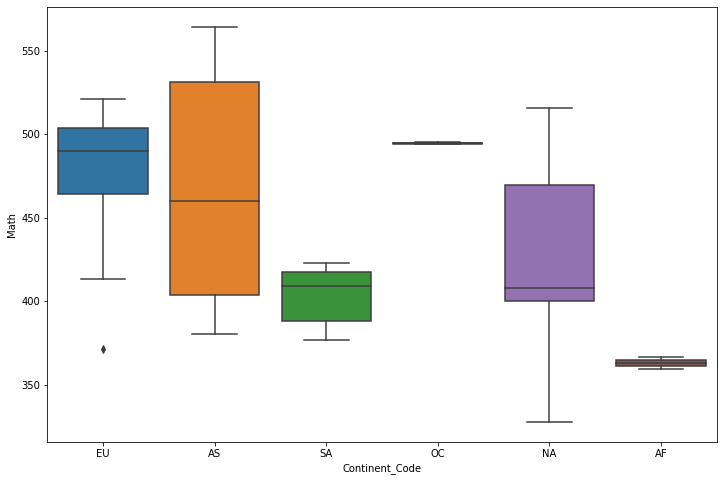

In [126]:
plt.figure(figsize = (12,8))
sns.boxplot(data=pisa, x="Continent_Code", y="Math");

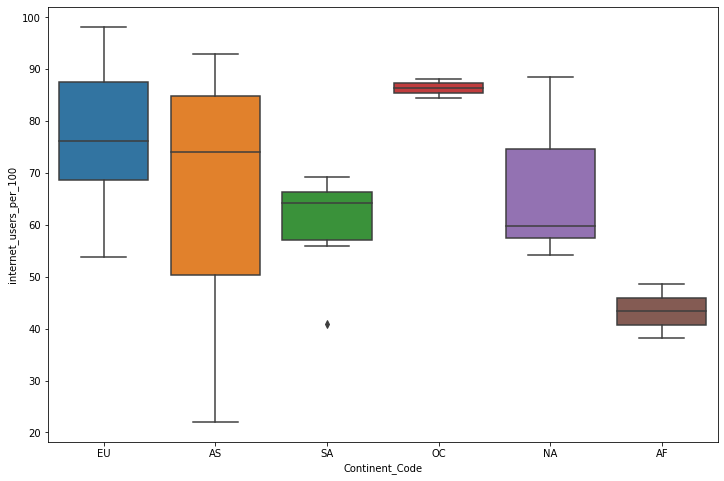

In [127]:
plt.figure(figsize = (12,8))
sns.boxplot(data=pisa, x="Continent_Code", y="internet_users_per_100");

## Analysis for EU

In [78]:
EU = pisa[pisa["Continent_Code"]=="EU"]
EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [79]:
EU.describe()


,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [85]:
EU.shape

(37, 6)

In [81]:
EU.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

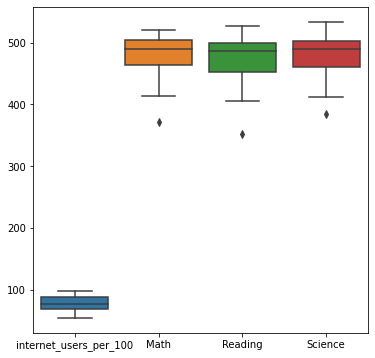

In [94]:
fig = plt.subplots(figsize=(6, 6))

sns.boxplot(data=EU);

In [105]:
united = (pisa[(pisa["Continent_Code"]=="EU" ) | (pisa["Continent_Code"]=="AS")])
united.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720


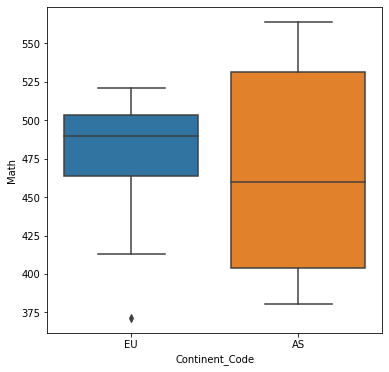

In [121]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.boxplot(y="Math", x="Continent_Code", data=united);

## Analysis for AS

In [86]:
ASIA = pisa[pisa["Continent_Code"]=="AS"]
ASIA

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997
33,ISR,AS,77.352090,469.6695,478.9606,466.5528
35,JOR,AS,60.114383,380.2590,408.1022,408.6691
36,JPN,AS,91.058028,532.4399,515.9585,538.3948
37,KAZ,AS,72.900000,459.8160,427.1410,456.4836
38,KOR,AS,89.648631,524.1062,517.4367,515.8099


In [87]:
ASIA.shape

(17, 6)

In [88]:
ASIA.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [89]:
ASIA.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

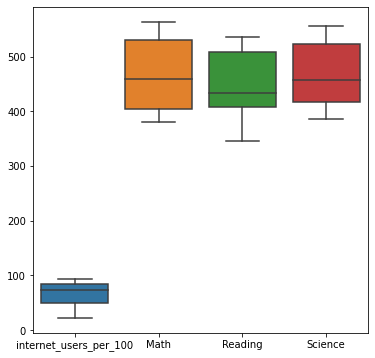

In [91]:
fig = plt.subplots(figsize=(6, 6))

sns.boxplot(data=ASIA);

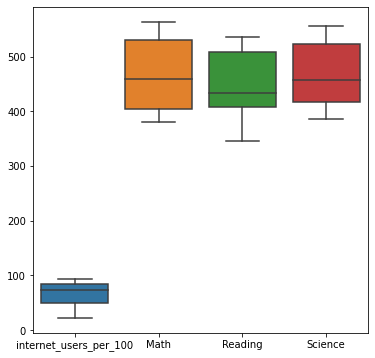

In [99]:
fig = plt.subplots(figsize=(6, 6))

sns.boxplot(data=ASIA);

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots. CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [ ]:
pisa.groupby("Continent_Code").describe().T["EU"]["Math"][1]

477.98144864864867

In [ ]:
pisa.groupby("Continent_Code").describe().T["AS"]["Math"][1]

466.2166470588236

In [ ]:
EU = pd.DataFrame(pisa[pisa["Continent_Code"]=="EU"]["Math"])

In [ ]:
ASIA = pd.DataFrame(pisa[pisa["Continent_Code"]=="AS"]["Math"])

Two-Sample t-Test : samples are independent, are randomly sampled from two normal populations and the two independent groups have equal variances.

In [ ]:
indTest = stats.ttest_ind(EU, ASIA, equal_var=True)
indTest.statistic, indTest.pvalue

(array([0.87005532]), array([0.38826888]))

In [ ]:
alpha = 0.025    ## two tail test so alpha / 2 

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [128]:
students = pd.read_csv("/content/students_2014 - students_2014.csv")
students.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [130]:
students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ids           435 non-null    int64  
 1   bday          427 non-null    object 
 2   enrolldate    406 non-null    object 
 3   expgradate    406 non-null    object 
 4   Rank          406 non-null    float64
 5   Major         276 non-null    object 
 6   Gender        426 non-null    float64
 7   Athlete       435 non-null    int64  
 8   Height        408 non-null    float64
 9   Weight        376 non-null    float64
 10  Smoking       411 non-null    float64
 11  Sprint        374 non-null    float64
 12  MileMinDur    392 non-null    object 
 13  English       409 non-null    float64
 14  Reading       425 non-null    float64
 15  Math          422 non-null    float64
 16  Writing       404 non-null    float64
 17  State         408 non-null    object 
 18  LiveOnCampus  414 non-null    

In [131]:
students.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ids,435.0,NaN,NaN,NaN,35279.022989,8637.733605,20183.0,28001.0,35350.0,42655.5,49947.0
bday,427,398,10/22/1991,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enrolldate,406,4,4-Aug-2014,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expgradate,406,5,13-May-2019,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,406.0,NaN,NaN,NaN,2.199507,1.098641,1.0,1.0,2.0,3.0,4.0
Major,276,247,nursing,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,426.0,NaN,NaN,NaN,0.521127,0.500141,0.0,0.0,1.0,1.0,1.0
Athlete,435.0,NaN,NaN,NaN,0.422989,0.494602,0.0,0.0,0.0,1.0,1.0
Height,408.0,NaN,NaN,NaN,68.031765,5.325655,55.0,64.8275,67.57,71.575,84.41
Weight,376.0,NaN,NaN,NaN,181.031569,42.74968,101.71,153.86,172.96,204.3075,350.07


In [132]:
students["English"].mean()

82.78755501222493

In [133]:
students["Math"].mean()

65.46800947867297

In [149]:
df = students.loc[:,["English","Math"]]
df

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [143]:
students.loc[:,["English","Math"]].corr(method='pearson', min_periods=1)

,English,Math
English,1.000000,0.243014
Math,0.243014,1.000000


There is weak positive corr.


is there a significant difference in the average of the English and Math tests.

H0 : no difference in the average

H1 : difference in the average

paired t test

alpha = 0.05

In [152]:
paired = stats.ttest_rel(df["English"], df["Math"], nan_policy='omit')
paired

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [154]:
alpha = 0.05   

if paired.pvalue < alpha:
    print("Reject the Null, there is significant difference")
else:
    print("Fail to reject")

Reject the Null, there is significant difference


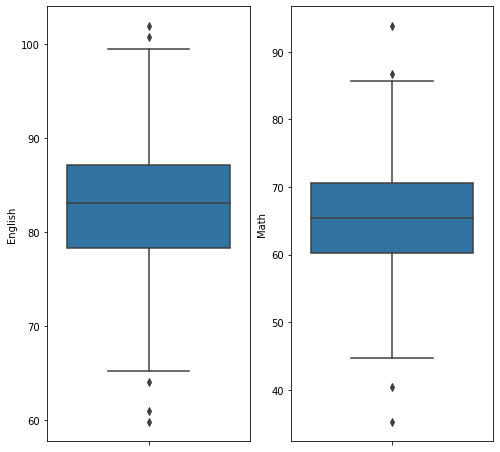

In [155]:
fig, axs = plt.subplots(ncols=2, figsize=(8,8))
sns.boxplot(y=df["English"], data=df, ax=axs[0])
sns.boxplot(y=df["Math"], data=df, ax=axs[1]);

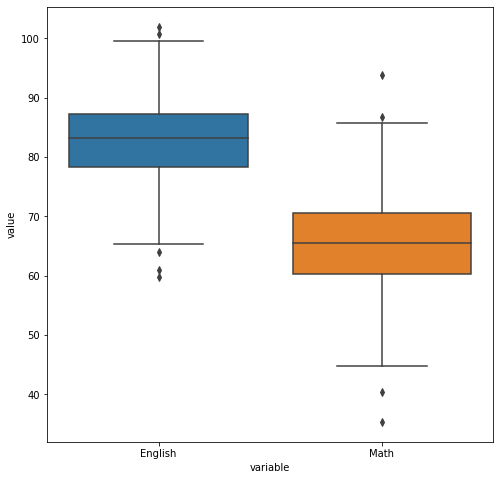

In [158]:
fig, axs = plt.subplots(figsize=(8,8))
df = pd.DataFrame(data=df, columns=["English", "Math"])
sns.boxplot(x="variable", y="value", data=pd.melt(df));